<a href="https://colab.research.google.com/github/rhiju/rna_lores2/blob/main/0_Simple_1D_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Fitting exponent of a polynomial; very simple 1D fit.
# Adapted from
# https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b

import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2)))

def forward(x, e):
    """Forward pass for our fuction"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-7

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward(x, exp)
y += 10.0* torch.randn(n)

# Model parameters
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)

# Optimizer (NEW)
opt = torch.optim.SGD([exp_hat], lr=learning_rate, momentum=0.9)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 2000):
    opt.zero_grad()
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.item())
    exp_history.append(exp_hat.item())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%100 == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss.item())
      print("exp = %s" % exp_hat.item())


Iteration 0
loss = 3092.892822265625
exp = 3.996549367904663
Iteration 100
loss = 287.1483154296875
exp = 2.9646005630493164
Iteration 200
loss = 139.0827178955078
exp = 2.6896731853485107
Iteration 300
loss = 84.55219268798828
exp = 2.523054361343384
Iteration 400
loss = 55.967384338378906
exp = 2.402601718902588
Iteration 500
loss = 38.512020111083984
exp = 2.3085715770721436
Iteration 600
loss = 27.02300453186035
exp = 2.2323272228240967
Iteration 700
loss = 19.311553955078125
exp = 2.169858694076538
Iteration 800
loss = 14.371039390563965
exp = 2.1198184490203857
Iteration 900
loss = 11.595175743103027
exp = 2.082265853881836
Iteration 1000
loss = 10.300103187561035
exp = 2.056596279144287
Iteration 1100
loss = 9.77820110321045
exp = 2.040297031402588
Iteration 1200
loss = 9.579816818237305
exp = 2.030247211456299
Iteration 1300
loss = 9.504595756530762
exp = 2.024057388305664
Iteration 1400
loss = 9.475674629211426
exp = 2.0202198028564453
Iteration 1500
loss = 9.464378356933594
e

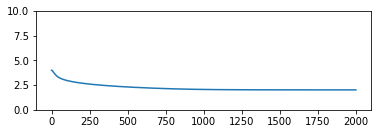

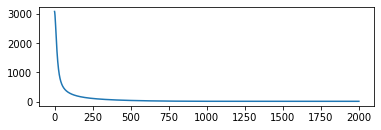

In [69]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(exp_history)
plt.ylim(0, 10)
plt.show()
plt.subplot(2,1,2)
plt.plot(loss_history)

tensor([2.0141], requires_grad=True)


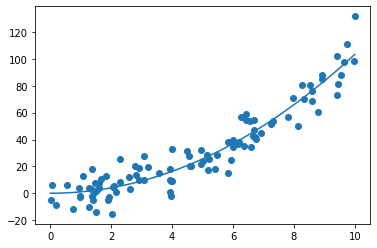

In [71]:

plt.scatter( x, y)
x_fine = Variable(torch.linspace(0,10,50), requires_grad=False)
y_fine = forward( x_fine, exp_hat )
print( exp_hat )
plt.plot(x_fine,y_fine.detach().numpy())
plt.show()


tensor([7.6246, 1.6421, 1.2282], requires_grad=True)


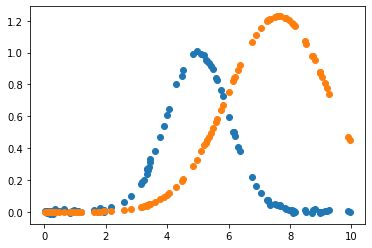

In [147]:
def forward_gaussian(x, params):
    """Forward pass for our fuction"""
    return params[2] * torch.exp( -(1/2)*((x - params[0])/params[1])**2 )

# Let's define some settings
n = 100 # number of examples


# Model definition
p = torch.Tensor( [5,1,1] )
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward_gaussian(x, p)
y += 0.01* torch.randn(n)

plt.scatter(x,y)

# fit?
p_init = Variable(torch.Tensor( 10.0 * torch.rand(3) ), requires_grad=True)
print(p_init)
y_hat = forward_gaussian(x, p_init)
plt.scatter(x,y_hat.detach().numpy())

Iteration 0
loss = 0.6434550881385803
tensor([7.6195, 1.6414, 1.2062], requires_grad=True)
Iteration 1000
loss = 0.0097347442060709
tensor([4.9955, 0.9994, 1.0009], requires_grad=True)


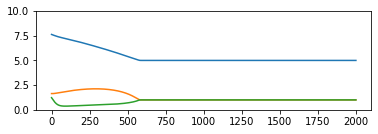

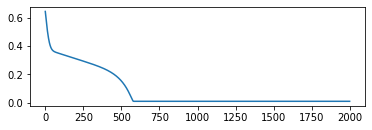

In [158]:
p_hat = Variable(p_init.clone(), requires_grad=True)

# Optimizer (NEW)
learning_rate = 5e-2

opt = torch.optim.SGD([p_hat], lr=learning_rate, momentum=0.1)
#opt = torch.optim.Adagrad([p_hat], lr=learning_rate)

loss_history = []
p_history = []

# Training loop
for i in range(0, 2000):
    opt.zero_grad()
    
    # Compute current estimate
    y_hat = forward_gaussian(x, p_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.item())
    p_history.append(p_hat.detach().numpy().copy())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%1000 == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss.item())
      print(p_hat)

plt.subplot(2,1,1)
plt.plot(p_history)
plt.ylim(0, 10)
plt.show()
plt.subplot(2,1,2)
plt.plot(loss_history)

tensor([2.0141], requires_grad=True)


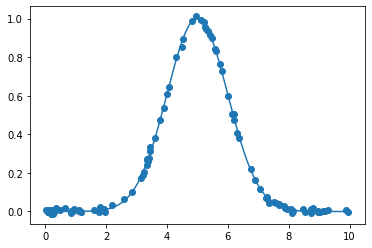

In [159]:
plt.scatter( x, y)
x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
y_fine = forward_gaussian( x_fine, p_hat )
print( exp_hat )
plt.plot(x_fine,y_fine.detach().numpy())
plt.show()


In [ ]:
for i in range(5):
  print( p_history[i] )

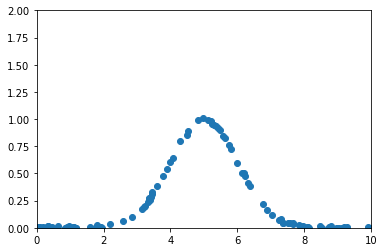

In [194]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
plt.scatter( x, y)
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
    y_fine = forward_gaussian( x_fine, p_history[5*i] )
    line.set_data(x_fine.numpy(), y_fine.numpy())
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True)

In [195]:
HTML(anim.to_html5_video())